# **Introduction**

Diabetes is a widespread chronic disease, and early prediction can aid in timely intervention. This project uses machine learning (SVM) to classify individuals as diabetic or non-diabetic based on medical parameters. The dataset is preprocessed, standardized, and split for training and evaluation to build an accurate predictive system.

Importing the dependencies

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and analysis


In [9]:
# loading the diabetes dataset to a pandas Dataframe
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [10]:
# printing the first five rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# number of rows and columns in this dataset
diabetes_dataset.shape

(768, 9)

In [12]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 --> Non-Diabetic

1 --> Diabetic

In [14]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [15]:
# seperating the data and labels
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [16]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [17]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Data Standardization

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X)

StandardScaler()

In [20]:
standardized_data = scaler.transform(X)

In [21]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [22]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [23]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train Test Split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state = 2)
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Training the Model

In [25]:
classifier = svm.SVC(kernel='linear')


In [26]:
# training the support vector machine classifer
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [27]:
# accuracy score of the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [28]:
print('Accuracy Score of the training data:', training_data_accuracy)

Accuracy Score of the training data: 0.7866449511400652


In [29]:
# accuracy score of the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [30]:
print(test_data_accuracy)

0.7727272727272727


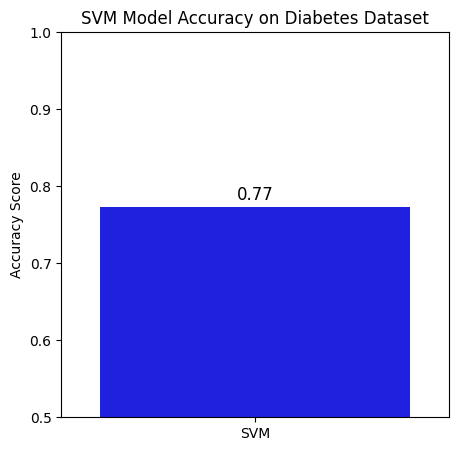

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# SVM Accuracy Score (Use the actual computed accuracy)
svm_acc = accuracy_score(Y_test, svm_pred)  # Ensure svm_pred is defined in your code

# Plot accuracy for SVM
plt.figure(figsize=(5, 5))
sns.barplot(x=['SVM'], y=[svm_acc], color="blue")
plt.ylim(0.5, 1)  # Adjust y-axis for better clarity
plt.ylabel("Accuracy Score")
plt.title("SVM Model Accuracy on Diabetes Dataset")

# Display accuracy value on the bar
for index, value in enumerate([svm_acc]):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

plt.show()


Making a predictive system

# Random Forest Classifier
Random Forest is an ensemble method that combines multiple decision trees. It generally performs well with fewer hyperparameters to tune.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2)

# Train the Random Forest classifier
rf_classifier.fit(X_train, Y_train)

# Predict on the training and test data
rf_train_prediction = rf_classifier.predict(X_train)
rf_test_prediction = rf_classifier.predict(X_test)

# Calculate accuracy for training and testing
rf_train_accuracy = accuracy_score(rf_train_prediction, Y_train)
rf_test_accuracy = accuracy_score(rf_test_prediction, Y_test)

print(f'Random Forest - Training Accuracy: {rf_train_accuracy}')
print(f'Random Forest - Test Accuracy: {rf_test_accuracy}')


Random Forest - Training Accuracy: 1.0
Random Forest - Test Accuracy: 0.7272727272727273


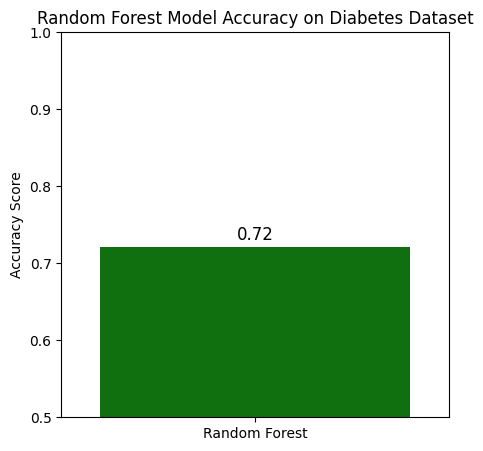

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Random Forest Accuracy Score (Use the actual computed accuracy)
rf_acc = accuracy_score(Y_test, rf_pred)  # Ensure rf_pred is defined in your code

# Plot accuracy for Random Forest
plt.figure(figsize=(5, 5))
sns.barplot(x=['Random Forest'], y=[rf_acc], color="green")
plt.ylim(0.5, 1)  # Adjust y-axis for better clarity
plt.ylabel("Accuracy Score")
plt.title("Random Forest Model Accuracy on Diabetes Dataset")

# Display accuracy value on the bar
for index, value in enumerate([rf_acc]):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

plt.show()


# Logistic Regression Classifier
Logistic Regression is a linear model used for binary classification. It is often used for simple classification tasks and interprets the relationship between independent variables and the probability of a binary outcome.

In [34]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=2)

# Train the Logistic Regression classifier
logreg_classifier.fit(X_train, Y_train)

# Predict on the training and test data
logreg_train_prediction = logreg_classifier.predict(X_train)
logreg_test_prediction = logreg_classifier.predict(X_test)

# Calculate accuracy for training and testing
logreg_train_accuracy = accuracy_score(logreg_train_prediction, Y_train)
logreg_test_accuracy = accuracy_score(logreg_test_prediction, Y_test)

print(f'Logistic Regression - Training Accuracy: {logreg_train_accuracy}')
print(f'Logistic Regression - Test Accuracy: {logreg_test_accuracy}')


Logistic Regression - Training Accuracy: 0.7850162866449512
Logistic Regression - Test Accuracy: 0.7597402597402597


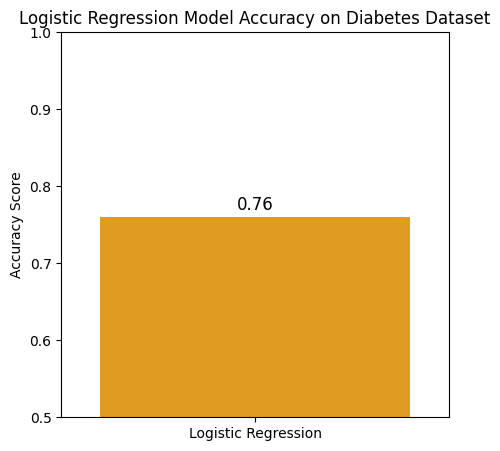

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Accuracy Score (Use the actual computed accuracy)
lr_acc = accuracy_score(Y_test, lr_pred)  # Ensure lr_pred is defined in your code

# Plot accuracy for Logistic Regression
plt.figure(figsize=(5, 5))
sns.barplot(x=['Logistic Regression'], y=[lr_acc], color="orange")
plt.ylim(0.5, 1)  # Adjust y-axis for better clarity
plt.ylabel("Accuracy Score")
plt.title("Logistic Regression Model Accuracy on Diabetes Dataset")

# Display accuracy value on the bar
for index, value in enumerate([lr_acc]):
    plt.text(index, value + 0.01, f"{value:.2f}", ha='center', fontsize=12)

plt.show()


In [36]:
# Print the accuracy scores for all models
print(f'Linear SVM - Test Accuracy: {test_data_accuracy}')
print(f'Random Forest - Test Accuracy: {rf_test_accuracy}')
print(f'Logistic Regression - Test Accuracy: {logreg_test_accuracy}')


Linear SVM - Test Accuracy: 0.7727272727272727
Random Forest - Test Accuracy: 0.7272727272727273
Logistic Regression - Test Accuracy: 0.7597402597402597


<ipython-input-39-7f03d1b79c98>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


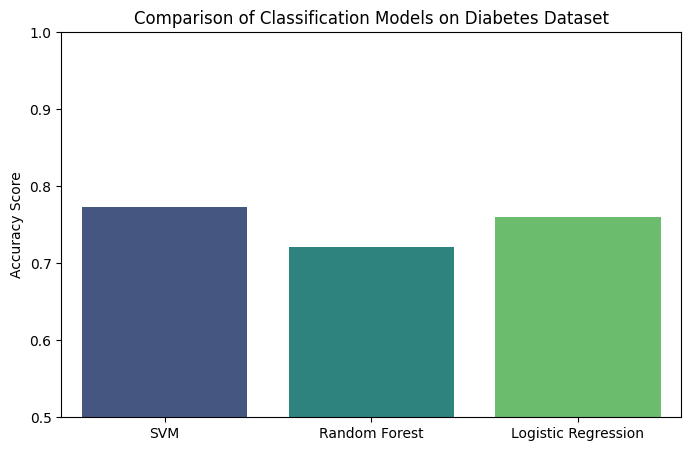

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their accuracies
models = ['SVM', 'Random Forest', 'Logistic Regression']
accuracies = [svm_acc, rf_acc, lr_acc]  # Use calculated accuracy values

# Plot accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.ylim(0.5, 1)  # Limit y-axis for better visualization
plt.ylabel("Accuracy Score")
plt.title("Comparison of Classification Models on Diabetes Dataset")
plt.show()


In [41]:
input_data = (3, 180, 85, 30, 200, 33.5, 0.600, 50)  # Example values for a diabetic patient

# Convert input to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape for a single prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Make prediction
prediction = classifier.predict(std_data)

# Output the result
if prediction[0] == 0:
    print('The person is NOT diabetic.')
else:
    print('The person iS diabetic.')


The person iS diabetic.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Key Points:
**Random Forest:** It generally works well with larger, more complex datasets and captures non-linear relationships between features.

**Logistic Regression:** It is best suited for linearly separable data, but still works effectively for many real-world classification tasks.


# **Conclusion**

The SVM model effectively predicts diabetes with a good accuracy score. Future improvements can include exploring other models, hyperparameter tuning, and expanding the dataset to enhance reliability. This project demonstrates the potential of AI in healthcare for early disease detection.